## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=i, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

50000/50000 [==============================] - 151s 3ms/step - loss: 2.2478 - accuracy: 0.1576 - val_loss: 2.5197 - val_accuracy: 0.2029
Epoch 47/50
50000/50000 [==============================] - 149s 3ms/step - loss: 2.2329 - accuracy: 0.1695 - val_loss: 2.6598 - val_accuracy: 0.2257
Epoch 48/50
50000/50000 [==============================] - 149s 3ms/step - loss: 2.2650 - accuracy: 0.1499 - val_loss: 3.1575 - val_accuracy: 0.1648
Epoch 49/50
50000/50000 [==============================] - 38318s 766ms/step - loss: 2.2700 - accuracy: 0.1429 - val_loss: 2.8961 - val_accuracy: 0.1610
Epoch 50/50
50000/50000 [==============================] - 154s 3ms/step - loss: 2.2667 - accuracy: 0.1494 - val_loss: 3.3207 - val_accuracy: 0.1829
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
________________________________________________

Epoch 41/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1541 - accuracy: 0.5895 - val_loss: 1.4013 - val_accuracy: 0.5129
Epoch 42/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.1442 - accuracy: 0.5931 - val_loss: 1.4355 - val_accuracy: 0.4944
Epoch 43/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1371 - accuracy: 0.5962 - val_loss: 1.3759 - val_accuracy: 0.5241
Epoch 44/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1267 - accuracy: 0.5984 - val_loss: 1.3712 - val_accuracy: 0.5244
Epoch 45/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.1268 - accuracy: 0.6004 - val_loss: 1.3532 - val_accuracy: 0.5203
Epoch 46/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1179 - accuracy: 0.6035 - val_loss: 1.4110 - val_accuracy: 0.5066
Epoch 47/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.1220 - accuracy:

Epoch 36/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.9010 - accuracy: 0.6780 - val_loss: 1.4579 - val_accuracy: 0.5188
Epoch 37/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8818 - accuracy: 0.6840 - val_loss: 1.4698 - val_accuracy: 0.5121
Epoch 38/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.8828 - accuracy: 0.6875 - val_loss: 1.5648 - val_accuracy: 0.4958
Epoch 39/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8824 - accuracy: 0.6851 - val_loss: 1.5076 - val_accuracy: 0.5105
Epoch 40/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8784 - accuracy: 0.6874 - val_loss: 1.6164 - val_accuracy: 0.4867
Epoch 41/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.8643 - accuracy: 0.6917 - val_loss: 1.6072 - val_accuracy: 0.4840
Epoch 42/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.8537 - accuracy:

50000/50000 [==============================] - 4s 80us/step - loss: 0.5222 - accuracy: 0.8171 - val_loss: 1.9260 - val_accuracy: 0.4732
Epoch 32/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.4905 - accuracy: 0.8307 - val_loss: 2.0420 - val_accuracy: 0.4677
Epoch 33/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.4779 - accuracy: 0.8329 - val_loss: 1.9678 - val_accuracy: 0.4700
Epoch 34/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.4480 - accuracy: 0.8448 - val_loss: 2.1217 - val_accuracy: 0.4580
Epoch 35/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.4329 - accuracy: 0.8491 - val_loss: 2.1767 - val_accuracy: 0.4588
Epoch 36/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.4358 - accuracy: 0.8476 - val_loss: 2.1789 - val_accuracy: 0.4529
Epoch 37/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.4212 - accuracy: 0.8531 - val_loss: 2.3209

50000/50000 [==============================] - 3s 57us/step - loss: 0.5874 - accuracy: 0.8051 - val_loss: 1.7474 - val_accuracy: 0.4753
Epoch 27/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.5646 - accuracy: 0.8140 - val_loss: 1.7283 - val_accuracy: 0.4760
Epoch 28/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.5386 - accuracy: 0.8226 - val_loss: 1.7724 - val_accuracy: 0.4773
Epoch 29/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.5159 - accuracy: 0.8302 - val_loss: 1.7845 - val_accuracy: 0.4811
Epoch 30/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.4920 - accuracy: 0.8375 - val_loss: 1.9314 - val_accuracy: 0.4661
Epoch 31/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.4713 - accuracy: 0.8479 - val_loss: 1.9533 - val_accuracy: 0.4565
Epoch 32/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.4504 - accuracy: 0.8525 - val_loss: 1.9085

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

NameError: name 'loss' is not defined

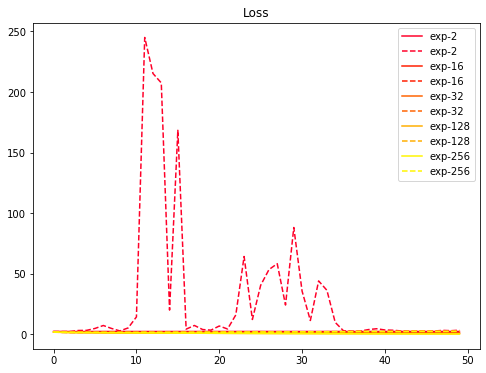

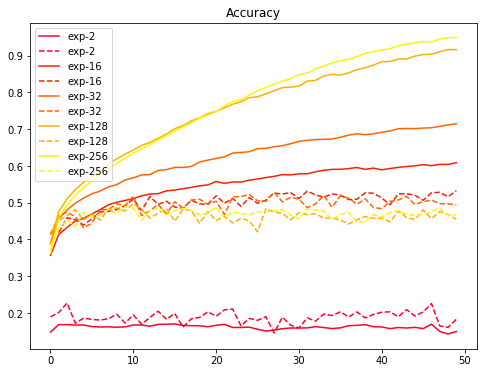

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()